## Import the needed libraries

In [1]:
from visualization_tools import *
from automaton import *
from scenario_reader import *
import json


from IPython.display import HTML

%reload_ext autoreload
%autoreload 2

## Task 1/5: Setting up the modeling environment

### 1. Basic visualization.

In [2]:
basic_scenario = {
    "width": 6,
    "height": 6,
    "cell_size": 1,
    "r_max":5,
    "pedestrian_coordinates": [{"x":1, "y":2}, {"x":2, "y":3},  {"x":2,"y":5}],
    "obstacle_coordinates":[{"x":3, "y":3},{"x":5, "y":2}],
    "target_coordinates":[{"x":5, "y":4}],
    "block_coordinates": [],
    "pedestrian_for_density": [],
    "use_dijkstra": False,
    "use_speed" : False,
    "speed":1,
    "follow":False ,
    "use_utility":False
}

In [3]:
scenario = Scenario(basic_scenario)
set_scenario(scenario)
scenario.states

array([[0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 2., 0.],
       [0., 1., 2., 0., 0., 0.],
       [0., 0., 0., 0., 3., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

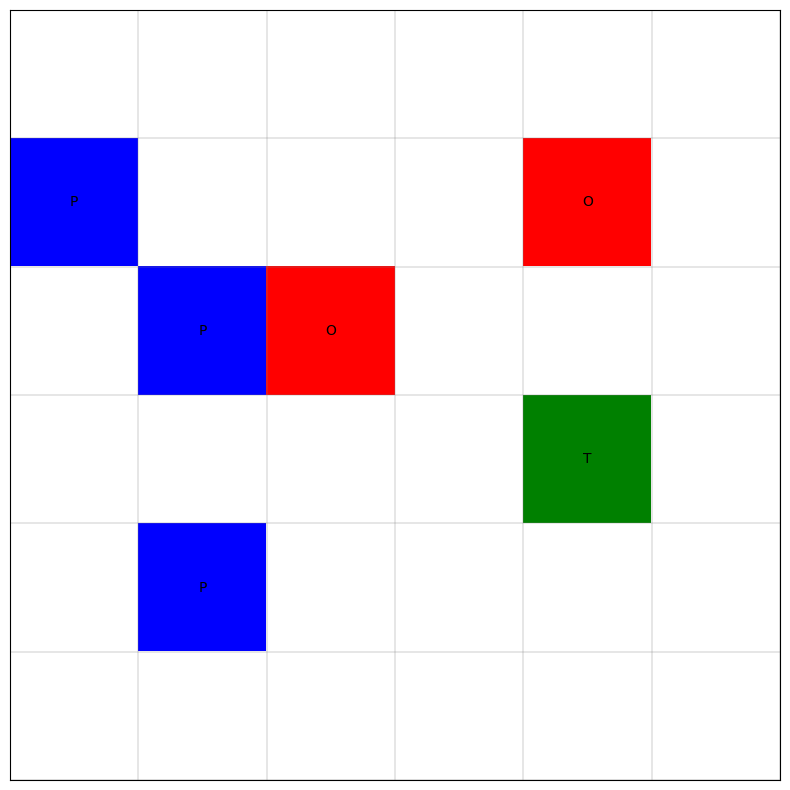

In [4]:
basic_plot = get_plot_states(scenario.states)

In [5]:
basic_plot.savefig("results/task1_basic_plot.pdf")

### 2. Move the pedestrian with regard to distance and avoid obstacles

In [6]:
automaton = Automaton(scenario)
simulation_scenario_states = automaton.simulation_multiple_steps()

Simulation stopped after 5 simulation steps, since the pedestrians have reached the target.
Having reached the preset maximum simulation steps.


In [7]:
simulation_scenario_states[0:-1] 

[array([[0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 2., 0.],
        [0., 1., 2., 0., 0., 0.],
        [0., 0., 0., 0., 3., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 2., 0.],
        [0., 0., 2., 0., 0., 0.],
        [0., 1., 0., 0., 3., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 2., 0.],
        [0., 0., 2., 0., 0., 0.],
        [0., 0., 1., 0., 3., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 2., 0.],
        [0., 0., 2., 0., 0., 0.],
        [0., 0., 0., 1., 3., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 2., 0.],
        [0., 0., 2., 1., 0., 0.],
        [0., 0., 0., 0., 3., 0.],
        [0., 0., 0., 0., 1., 0.],
      

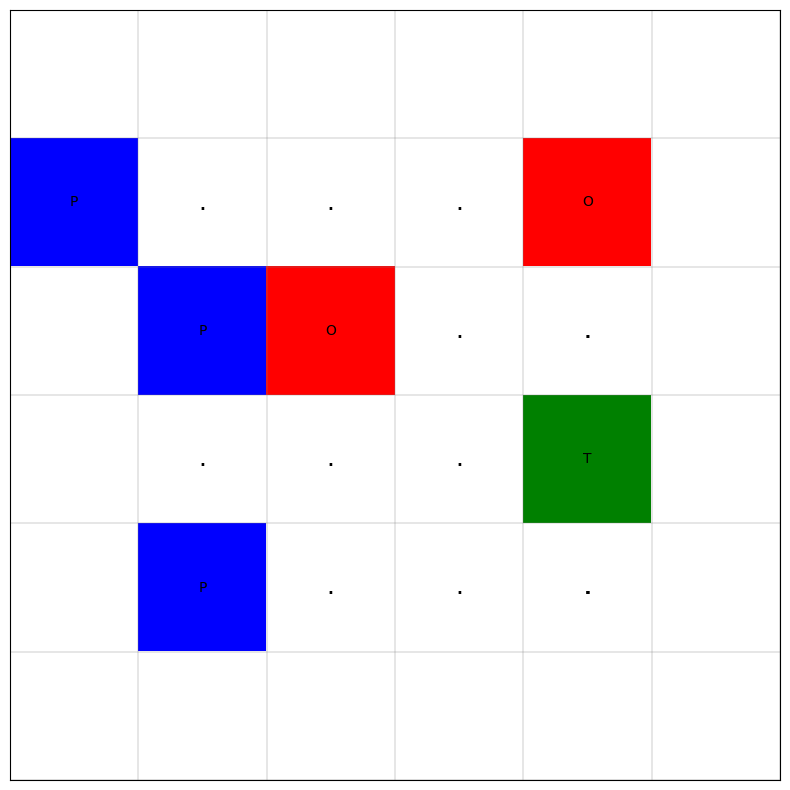

In [8]:
#%matplotlib notebook
ploted_states_basic = get_plot_all_simulation_states(simulation_scenario_states, scenario)
HTML(ploted_states_basic.to_jshtml())

In [9]:
ploted_states_basic.save('results/task1_basic_scenario.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


### 3. Create block obstacles and generate pedestrians in a certain area with density

In [10]:
basic_scenario2 = {
    "width": 9,
    "height": 9,
    "cell_size": 1,
    "r_max":8,
    "pedestrian_coordinates": [],
    "obstacle_coordinates":[],
    "target_coordinates":[{"x":8, "y":8}],
    "block_coordinates": [{"upper_left_x":5, "upper_left_y":3, "lower_right_x":6, "lower_right_y":7}],
    "pedestrian_for_density": [{"density": 0.2, "upper_left_x": 1, "upper_left_y": 2, "lower_right_x": 3, "lower_right_y":6}],
    "use_dijkstra": False,
    "use_speed" : False,
    "speed":1,
    "follow":False ,
    "use_utility":True
}

In [11]:
scenario2 = Scenario(basic_scenario2)
set_scenario(scenario2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 2., 2., 0., 0., 0.],
       [1., 1., 1., 0., 2., 2., 0., 0., 0.],
       [1., 1., 1., 0., 2., 2., 0., 0., 0.],
       [0., 1., 1., 0., 2., 2., 0., 0., 0.],
       [0., 0., 0., 0., 2., 2., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

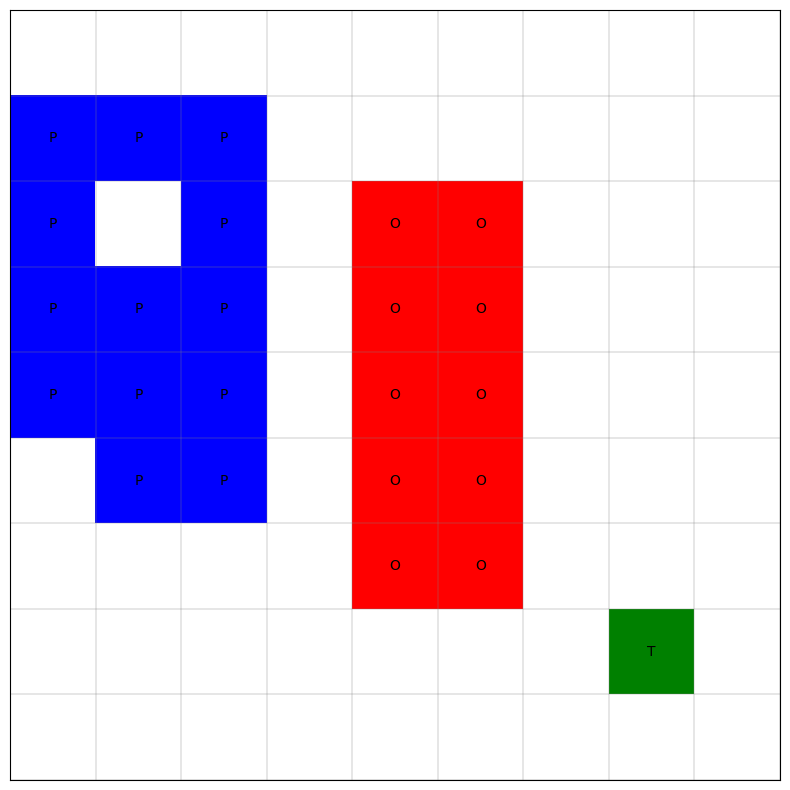

In [12]:
basic_plot2 = get_plot_states(scenario2.states)

In [13]:
basic_plot2.savefig("results/task1_basic_plot_obstacle_density.pdf")

In [14]:
ploted_states_basic.save('results/task4_eucli.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


### 4. Consider speed with "use_speed" == True, 
### Use dijkstra with "use_dijkstra" == True, 
### And make pedestrian strictly follow each other with "follow" == True,
### More useful functions will be discussed later in the following 4 tasks......